In [ ]:
import pandas as pd

df_lex = pd.read_csv("2000.tsv", sep="\t", header=None)
df_lex.columns=["word","sentiment", "std.dev"]

In [ ]:
df_lex

<Axes: title={'center': 'Frequency distribution of normalised sentiment score'}, ylabel='Frequency'>

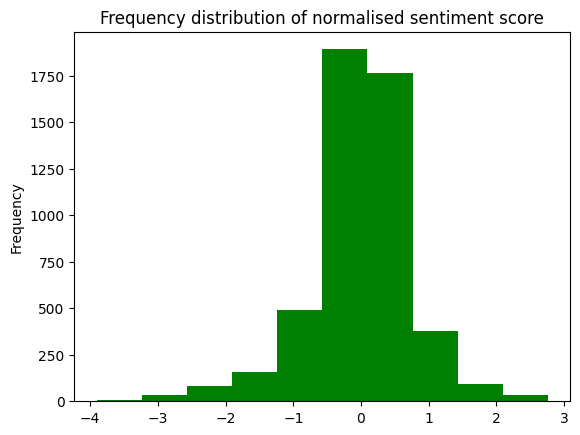

In [ ]:
#Q1
df_lex["sentiment"].plot(kind="hist", color="g",
                         title="Frequency distribution of normalised sentiment score")

In [ ]:
import json

comments = []
for i in range(1,6):
  with open("yt%i.json" % i, "r") as f:
    data = json.load(f)
    for item in data["items"]:
      comment = item["snippet"]["topLevelComment"]["snippet"]["textDisplay"]
      comment = comment.strip()
      if len(comment) < 10:
        continue
      comments.append({"text": comment})
df = pd.DataFrame(comments)
df

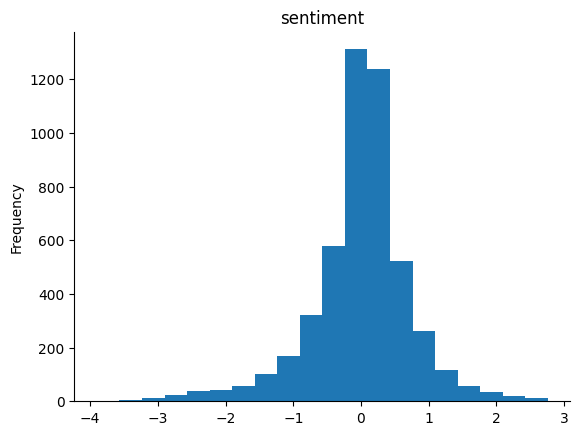

In [ ]:
# @title sentiment

from matplotlib import pyplot as plt
df_lex['sentiment'].plot(kind='hist', bins=20, title='sentiment')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#Q2
df_lex["sentiment"].mean()

1.4216084484146291e-05

In [ ]:
#Q3
df_lex.sort_values(by="sentiment",
                   ascending=False).head(5)["sentiment"].mean().round(2)

2.72

In [ ]:
df_lex["sentiment"] <= -.5

0        True
1        True
2        True
3        True
4        True
        ...  
4919    False
4920    False
4921    False
4922    False
4923    False
Name: sentiment, Length: 4924, dtype: bool

In [ ]:
#Q4
df_lex[df_lex["sentiment"] <= -.5]

,word,sentiment,std.dev
0,ugly,-3.90,1.16
1,painful,-3.69,1.53
2,intent,-3.49,1.67
3,terrible,-3.38,1.55
4,drunk,-3.28,1.16
...,...,...,...
851,dozens,-0.50,0.40
852,arab,-0.50,0.65
853,somebody,-0.50,1.10
854,fog,-0.50,0.74


In [ ]:
df_lex[["word", "sentiment"]].to_dict("records")

[{'word': 'ugly', 'sentiment': -3.9},
 {'word': 'painful', 'sentiment': -3.69},
 {'word': 'intent', 'sentiment': -3.49},
 {'word': 'terrible', 'sentiment': -3.38},
 {'word': 'drunk', 'sentiment': -3.28},
 {'word': 'tragedy', 'sentiment': -3.26},
 {'word': 'awful', 'sentiment': -3.21},
 {'word': 'weak', 'sentiment': -3.12},
 {'word': 'worst', 'sentiment': -3.1},
 {'word': 'accident', 'sentiment': -3.03},
 {'word': 'nightmare', 'sentiment': -3.02},
 {'word': 'victim', 'sentiment': -3.01},
 {'word': 'destruction', 'sentiment': -2.95},
 {'word': 'faced', 'sentiment': -2.93},
 {'word': 'damned', 'sentiment': -2.92},
 {'word': 'souls', 'sentiment': -2.92},
 {'word': 'scary', 'sentiment': -2.92},
 {'word': 'poverty', 'sentiment': -2.89},
 {'word': 'suicide', 'sentiment': -2.85},
 {'word': 'events', 'sentiment': -2.85},
 {'word': 'sorts', 'sentiment': -2.84},
 {'word': 'trapped', 'sentiment': -2.83},
 {'word': 'monster', 'sentiment': -2.82},
 {'word': 'lonely', 'sentiment': -2.8},
 {'word': 'c

In [ ]:
#Q5
mapping = {}
for row in df_lex[["word", "sentiment"]].to_dict("records"):
  mapping[row["word"]] = row["sentiment"]
mapping

In [ ]:
#Q6
comment = "i think breaking bad is boring"
def sentiment_score_text(text):
  text = text.lower()
  score = 0
  n = 0
  for word in text.split():
    if word in mapping:
      n += 1
      score += mapping[word]
  if n > 0:
    return score / n
  return 0
round(sentiment_score_text(comment),2)


-0.43

In [ ]:
#Q7
def sentiment_score(row):
  text = row["text"].lower()
  score = 0
  n = 0
  for word in text.split():
    if word in mapping:
      n += 1
      score += mapping[word]
  if n > 0:
    return score / n
  return 0

df["simple_sentiment"] = df.apply(sentiment_score, axis=1)
df

,text,simple_sentiment
0,They had to smash it with the handle of a knif...,-0.303333
1,YEAH SIMPLE INGREDIENTS MR BETCH,0.550000
2,Tuco’s looking pretty tight yo ❤,0.763333
3,I’m wondering if these are keto friendly.. Lol.,-0.860000
4,They ain’t that good low key,0.305000
...,...,...
462,This is literally the reason why i bought popc...,-0.061667
463,aint no way they actually made this a commerci...,-0.166667
464,When I tasted the white cheddar popcorners shi...,0.030000
465,Imagine the production and recipe teams for Po...,0.112727


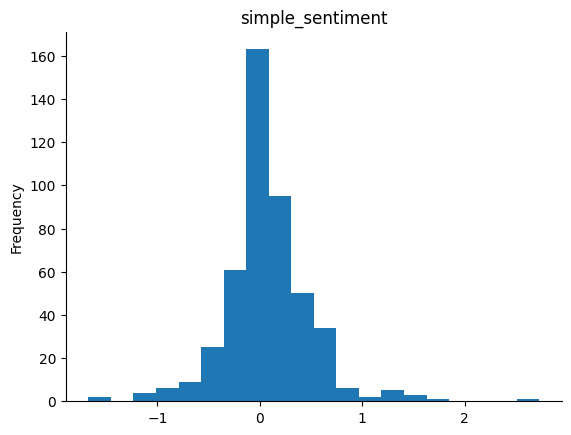

In [ ]:
# @title simple_sentiment

from matplotlib import pyplot as plt
df['simple_sentiment'].plot(kind='hist', bins=20, title='simple_sentiment')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#Q8
# "absolutely loved" - may have a compounding positive effect
sentiment_score_text("Saw the commercial I tried them as a joke then I absolutely loved them")

-0.078

In [ ]:
mapping["love"]

KeyError: 'hate'

In [ ]:
#Q9
comment = "Saw the commercial I tried them as a joke then I absolutely loved them"
words = comment.lower().split()
for left, right in zip(words[:-1], words[1:]):
  print(left, right)

# this is a manual way of creating bigrams or context aware lexicons

saw the
the commercial
commercial i
i tried
tried them
them as
as a
a joke
joke then
then i
i absolutely
absolutely loved
loved them


In [ ]:
#Q10
import nltk

nltk.download("vader_lexicon")
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
def score_vader(row):
  text = row["text"]
  return sia.polarity_scores(text)["compound"]

df["vader_sentiment"] = df.apply(score_vader, axis=1)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
df

,text,simple_sentiment,vader_sentiment
0,They had to smash it with the handle of a knif...,-0.303333,0.0000
1,YEAH SIMPLE INGREDIENTS MR BETCH,0.550000,0.2960
2,Tuco’s looking pretty tight yo ❤,0.763333,0.4939
3,I’m wondering if these are keto friendly.. Lol.,-0.860000,0.4215
4,They ain’t that good low key,0.305000,0.2023
...,...,...,...
462,This is literally the reason why i bought popc...,-0.061667,-0.2960
463,aint no way they actually made this a commerci...,-0.166667,0.2235
464,When I tasted the white cheddar popcorners shi...,0.030000,-0.5574
465,Imagine the production and recipe teams for Po...,0.112727,0.0000


<Axes: ylabel='Frequency'>

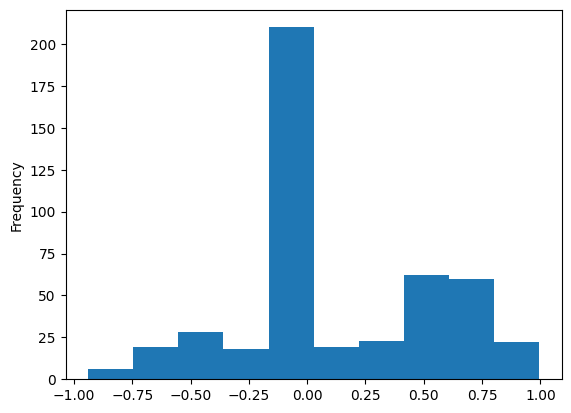

In [ ]:
#Q11
df["vader_sentiment"].plot(kind="hist")

<Axes: ylabel='Frequency'>

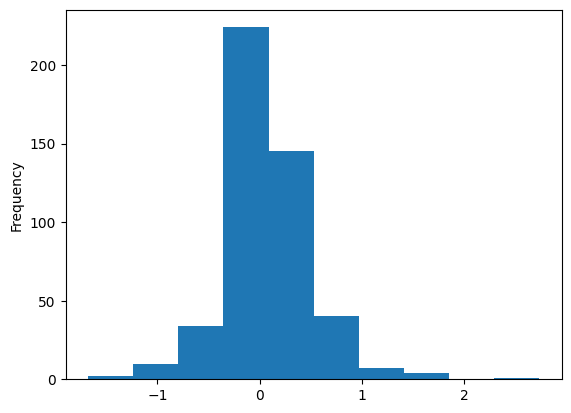

In [ ]:
df["simple_sentiment"].plot(kind="hist")